## Wine quality determination (Regression)
A chemical analysis was carried out for 1599 red wine samples, after which the quality of each sample was analyzed by experts in scale 0..10.

The chemical analaysis reveals 11 features for each wine sample, which are:
fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol (concentration). Each feature is a floating point value, and the quality is an integer between 0 to 10.  


## Task 1


### Read the data

- Read a CSV-file, called `winequality-red.csv`
- Separate 11 first columns and all rows to your design matrix X
- Use the last column, quality, as dependent variable (target)


### Make training set and test set
Separate your data X and y to training set (X_train, y_train) which contains 75% of the data and to the test set X_test, y_test which contains 25% of the data.

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
# YOUR CODE HERE
# Read the CSV file
from sklearn.model_selection import train_test_split
wine_data = pd.read_csv('winequality-red.csv')


X = wine_data.iloc[:, :-1]  
y = wine_data.iloc[:, -1]   


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,    
    random_state=42,   
    stratify=y        
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1199, 11)
Test set shape: (400, 11)


In [26]:
points=0

required_variables=('X_train', 'X_test')
for variable in required_variables:
    if variable not in globals():
        print (f"Variable {variable} is missing, please define it!")
        raise Exception(f"Variable '{variable}' is not defined")

## >> Some tests, do not change
if (X_train.shape==(1199,11)):
    points+=1
if (X_test.shape==(400,11)):
    points+=1

points

2

## Task 2

- Study the data, select a regression algorithm for predicting the quality of the wine, based on it's chemical features. You can assume that the quality is a floating point number.
- Train the regression algorithm using the training data. (Extratrees, or GBTR should work fine, Perhaps Lasso as well, but the ensemble methods are easier for feature selection)
- Use cross validation to test the performance of the regressor and tune it's parameters as good as you can
- Finally test the regressor with the test set
- Report the score (= $R^2$ = coefficient of determination) of the regressor in the training set, cross validation and in the test set
- Plot the predicted quality against the known quality 
- What does the $R^2$ score tells? 
- What is your opinion of the performance? Is there signs of overfitting?

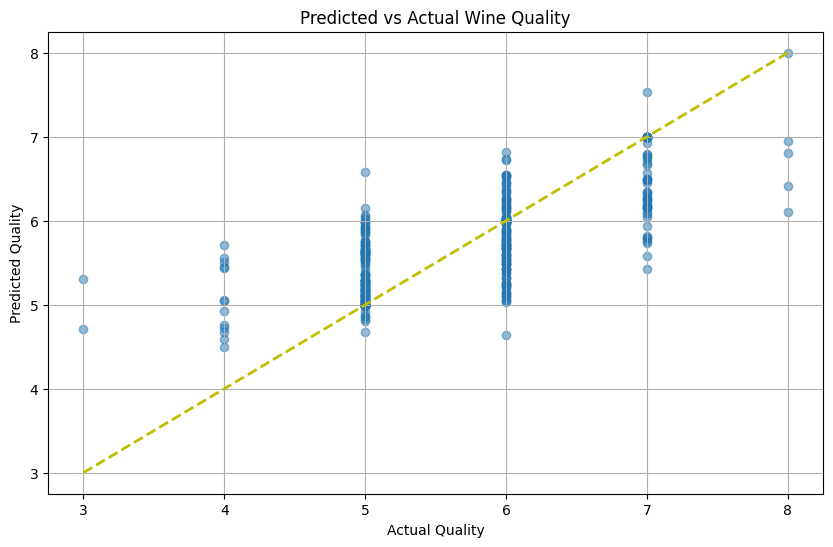

Accurary in the training set..1.000000
Accurary in crossvalidation...0.488937
Accurary in the test set......0.524201
Yes there is a signs of overfitting


In [29]:
from sklearn.pipeline import Pipeline

# YOUR CODE HERE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ExtraTreesRegressor(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ))
])


pipeline.fit(X_train, y_train)

# Calculate scores
train_score = pipeline.score(X_train, y_train)
cv_score = np.mean(cross_val_score(pipeline, X_train, y_train, cv=7))
test_score = pipeline.score(X_test, y_test)


y_pred = pipeline.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'y--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted vs Actual Wine Quality')
plt.grid(True)
plt.show()

print("Accurary in the training set..%f" % train_score)
print("Accurary in crossvalidation...%f" % cv_score)
print("Accurary in the test set......%f" % test_score)
print("Yes there is a signs of overfitting")

In [30]:
points=0
required_variables=('train_score', 'cv_score', 'test_score')
for variable in required_variables:
    if variable not in globals():
        print (f"Variable {variable} is missing, please define it!")
        raise Exception(f"Variable '{variable}' is not defined")
    

### >>>> Some testing
# The coefficient of determination should be between 0.4 - 0.5 in the
# test set depending on your regression algorithm and parameters
points=0
assert('train_score' in globals()), "Please use train_score variable for storing the training score"
assert('cv_score' in globals()), "Please use cv_score variable for storing the crossvalidation score"
assert('test_score' in globals()), "Please use test_score variable for storing the test score"
points=1

assert(train_score>0.85), "Try again, if you can get better accuracy by tuning the regressor parameters"
points+=1


points

2

## Task 3, Select the best features

Like it often is, some features are more important for regression than the others. 

- Study which features are the most important for predicting the quality. If you used Extratrees regressor or GradientBoostedTree regressor, then you can use the .feature_importances vector.
- Plot a bar graph or stem plot to visualize the importance of features
- To check the importance of a single variable, plot a scatter plot using true quality in x-axis and the value of teh most important variable in y-axis.
- Make a vector `features` which contains the names of the three most important features in decreasing order

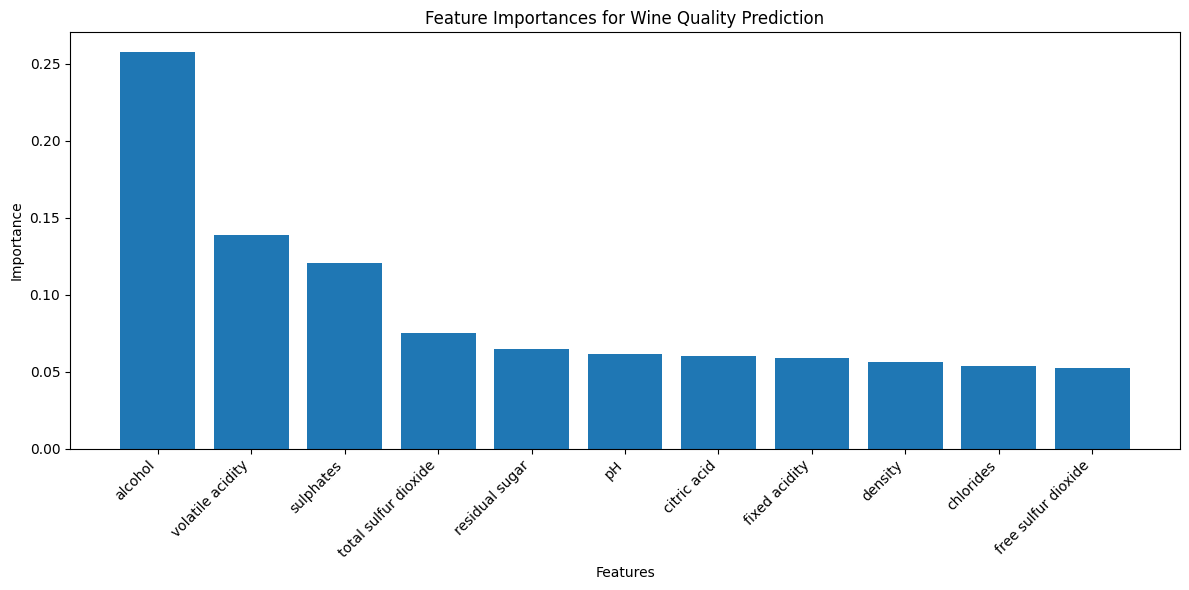

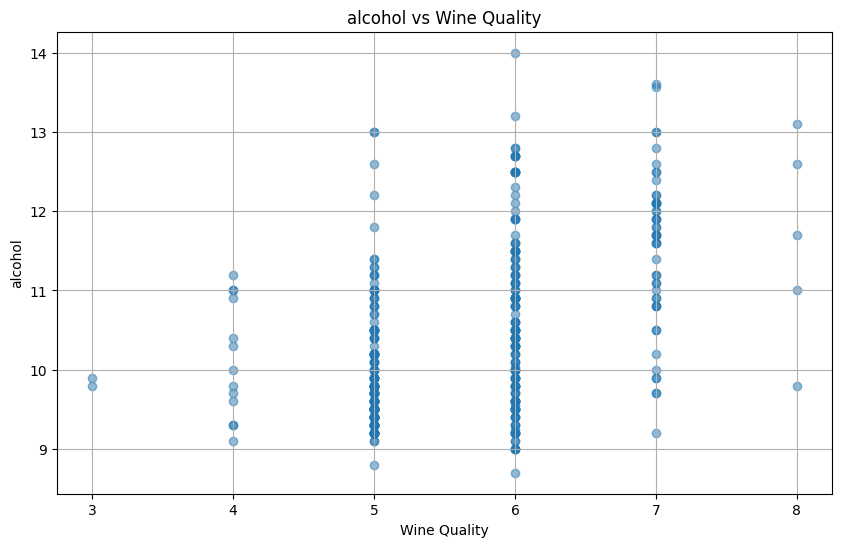

Top 3 most important features: ['alcohol', 'volatile acidity', 'sulphates']


In [31]:
features=['f1', ]
# YOUR CODE HERE

importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = X_train.columns


indices = np.argsort(importances)[::-1]
features = list(feature_names[indices[:3]])  # Get top 3 feature names


plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances for Wine Quality Prediction')
plt.tight_layout()
plt.show()


most_important_feature = features[0]
plt.figure(figsize=(10, 6))
plt.scatter(y_test, X_test[most_important_feature], alpha=0.5)
plt.xlabel('Wine Quality')
plt.ylabel(most_important_feature)
plt.title(f'{most_important_feature} vs Wine Quality')
plt.grid(True)
plt.show()

print("Top 3 most important features:", features)

In [32]:
points=0
required_variables=('features',)
for variable in required_variables:
    if variable not in globals():
        print (f"Variable {variable} is missing, please define it!")
        raise Exception(f"Variable '{variable}' is not defined")

assert(len(features)==3), "Please put the names of three most important features in list features!"
points=1

points

1